In [1]:
# 1. 데이터 로드
import pandas as pd

# 데이터 로드
df = pd.read_csv('simple_field.csv', encoding='utf-8')

# 데이터 확인
df.tail(4)

,항목,대화
5476,정서학대,Q: 주변 어른들 때문에 기분이 안 좋아진 적이 있어? A: 아빠가 저보고 어디 내...
5477,정서학대,Q: 부모님이나 선생님 때문에 기분이 안 좋아진 적이 있나요? A: 저번에 점심시간...
5478,신체학대,Q: 주위 어른들이나 가족들 중 나를 때렸던 사람이 있었어요? A: 엄마가요. Q:...
5479,학교폭력,Q: 친구들이 나를 자주 놀리거나 괴롭힌다고 느낀 적이 있나요? A: 네. 선배 언...


In [2]:
# 2. 데이터 전처리 및 특성 추출
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from konlpy.tag import Okt

# 특성과 레이블 분리
X = df['대화']
y = df['항목']

# 학습용 데이터와 테스트용 데이터 분리
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Okt 형태소 분석기를 이용한 토크나이저 함수 정의
okt = Okt()


def okt_tokenizer(text):
    return okt.morphs(text)


# TF-IDF 벡터라이저를 이용하여 텍스트를 수치화
vectorizer = TfidfVectorizer(tokenizer=okt_tokenizer, max_features=5000)
X_train_vectors = vectorizer.fit_transform(X_train)
X_test_vectors = vectorizer.transform(X_test)

In [ ]:
# 3. SVM 모델 정의 및 학습
from sklearn.svm import SVC

# 모델 정의
model = SVC(kernel='linear', C=1.0)

# 모델 학습
model.fit(X_train_vectors, y_train)

SVC(kernel='linear')

In [4]:
# 4. 모델 평가
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report

# 테스트 데이터에 대한 예측
y_pred = model.predict(X_test_vectors)

# 정확도 계산
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# F1 스코어 계산
f1 = f1_score(y_test, y_pred, average='weighted')
print("F1 Score:", f1)

# 분류 보고서 출력
print("Classification Report:\n", classification_report(y_test, y_pred))

# 혼돈 행렬 계산
cm = confusion_matrix(y_test, y_pred)

# 클래스 레이블 추출
labels = model.classes_

Accuracy: 0.9543795620437956
F1 Score: 0.953490143676756
Classification Report:
               precision    recall  f1-score   support

        가정폭력       0.95      1.00      0.98        60
          방임       0.87      0.99      0.93       104
         성학대       1.00      0.98      0.99        66
        신체학대       1.00      0.97      0.99       148
       자해/자살       0.97      0.98      0.97        87
        정서학대       0.92      1.00      0.96       194
        트라우마       0.99      0.98      0.99       187
        학교폭력       1.00      1.00      1.00        56
        해당없음       0.93      0.80      0.86       194

    accuracy                           0.95      1096
   macro avg       0.96      0.97      0.96      1096
weighted avg       0.96      0.95      0.95      1096



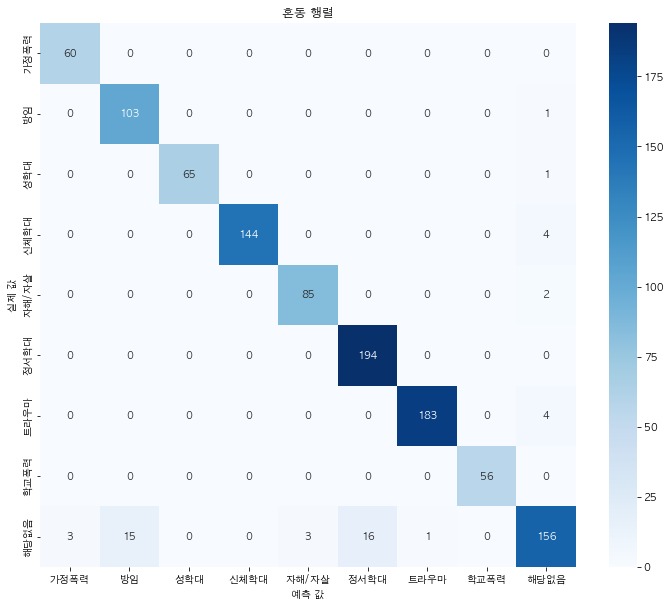

In [5]:
# 5. 결과 시각화
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False

# 혼돈 행렬 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels,
            yticklabels=labels, cmap='Blues')
plt.ylabel('실제 값', weight='bold')
plt.xlabel('예측 값', weight='bold')
plt.title('혼동 행렬', weight='bold', size=12)
plt.show()